In [1]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Step 0. Load libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns
import pickle
import xgboost as xgb


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
from imblearn.over_sampling import SMOTE
import imblearn
warnings.filterwarnings('ignore')


In [3]:
# carga de los dataset:
train_df=pd.read_csv('mitbih_train.csv',header=None)
test_df=pd.read_csv('mitbih_test.csv',header=None)

In [4]:
# Dataset desvalanceados: 
X_train=train_df.iloc[:,:-1]
y_train=train_df.iloc[:,-1]

In [5]:
X_test=test_df.iloc[:,:-1]
y_test=test_df.iloc[:,-1]

In [6]:
y_test.shape

(21892,)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(87554, 187)
(87554,)
(21892, 187)
(21892,)


In [8]:
y_test.shape

(21892,)

***Gradient Boosting***

In [9]:
# Fit a Gradient Boosting model
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))


0.8035812168828796

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90     18118
         1.0       0.34      0.10      0.16       556
         2.0       0.31      0.27      0.29      1448
         3.0       0.56      0.03      0.06       162
         4.0       0.38      0.69      0.49      1608

    accuracy                           0.80     21892
   macro avg       0.50      0.40      0.38     21892
weighted avg       0.82      0.80      0.80     21892



In [10]:
import pickle
# Save the model as a pickle
import pickle
filename = './modelos/gb.pkl'
pickle.dump(clf, open(filename, 'wb'))


In [11]:
# matriz de confución normalizada:
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [12]:
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)


Normalized confusion matrix


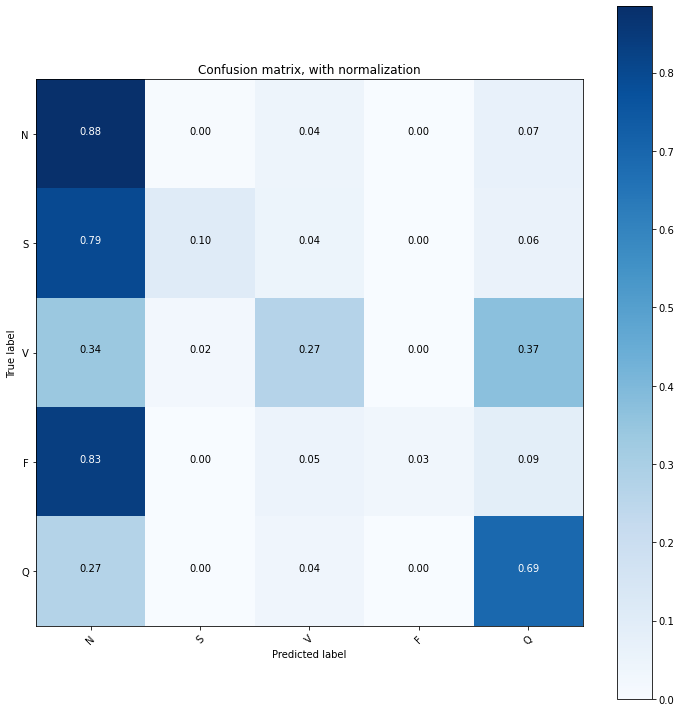

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_df, y_pred_df)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'], normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()
